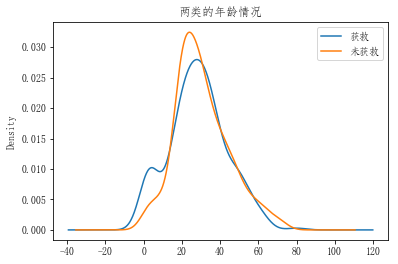

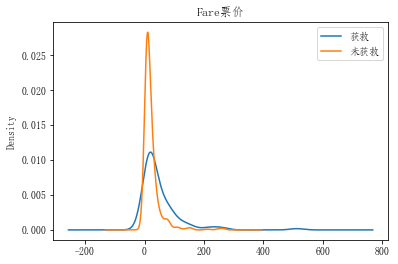

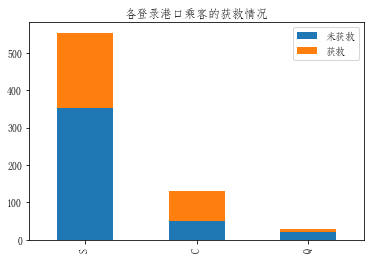

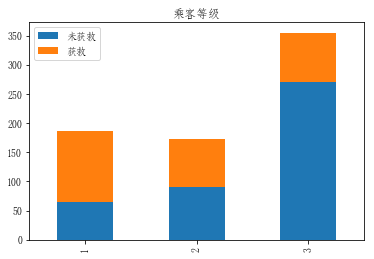

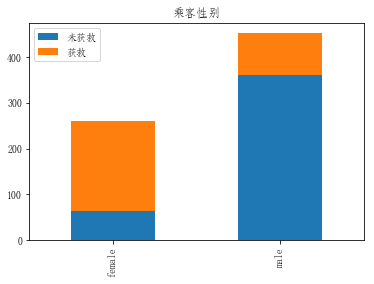

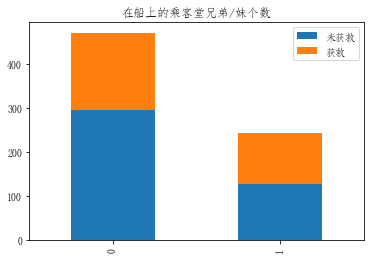

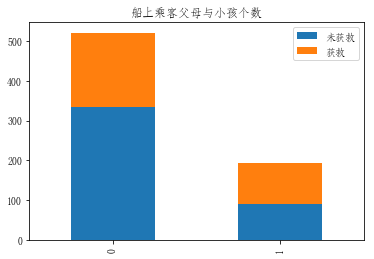

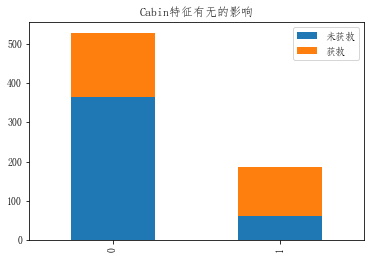

In [10]:
import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import re
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

#载入数据
data_train = pd.read_csv("./train.csv")
#获取年龄不缺失的集合
data_allage=data_train[data_train.Age.notnull()]
#分别获取获救集合与未获救集合
data_Survived=data_allage[data_allage.Survived == 1]
data_notSurvived=data_allage[data_allage.Survived == 0]
#对Name按 Mr,Miss,Mrs,Master,Norm分类
def setName(data):
#     print(data)
    name=[]
    Mr='^.* Mr\. .*$'
    Miss='^.* Miss\. .*$'
    Mrs='^.* Mrs\. .*$'
    Master='^.* Master\. .*$'
    lens = len(data)
    print(lens)
    Name_num=data.copy()
    for i in range(lens):
        print(i,data[i])
        if re.match(Mr,data[i]):
            name.append('Mr')
            data.loc[i]='Mr'
            Name_num.loc[i]=0
        elif re.match(Miss,data[i]):
            name.append('Miss')
            data.loc[i]='Miss'
            Name_num.loc[i]=1
        elif re.match(Mrs,data[i]):
            name.append('Mrs')
            data.loc[i]='Mrs'
            Name_num.loc[i]=2
        elif re.match(Master,data[i]):
            name.append('Master')
            data.loc[i]='Master'
            Name_num.loc[i]=3
        else:
            name.append('Norm')
            data.loc[i]='Norm'
            Name_num.loc[i]=4
#     print(len(name),name)
    #转换类型
    Name_num=changeDtype(Name_num)
#     print(data.values)
    return data,Name_num
#分别显示获救和未获救的曲线（数据为连续实数：dataflag=‘real’），或者直方图（数据为离散类别：dataflag='class'）
def showDataFig(surviveddatalist,notsurviveddatalist,flag,title=None):
    if(flag=='real'):#实数
        surviveddatalist.plot(kind='kde')   
        notsurviveddatalist.plot(kind='kde')
        plt.legend((u'获救', u'未获救'),loc='best')
    elif(flag=='class'):
        #顺便统计有没有缺失值，给空出来
        df=pd.DataFrame({ u'未获救':notsurviveddatalist.value_counts(),u'获救':surviveddatalist.value_counts()})
        df.plot(kind='bar', stacked=True)
    else:
        return;
    if title!=None:
        plt.title(title)
    plt.show()
        
#分析所有数值特征在获救和未获救数据集上的情况，主要看均值和方差
#print(data_Survived.describe(),data_notSurvived.describe())
sd=data_Survived.describe()
snd=data_notSurvived.describe()
sd.PassengerId.mean()

#分别获取Name对获救情况的影响
# data_Survived['NameExtens'],_=setName(data_Survived['Name'].copy())
# data_notSurvived['NameExtens'],_=setName(data_notSurvived['Name'].copy())
#各登录港口乘客的获救情况
# showDataFig(data_Survived.NameExtens,data_notSurvived.NameExtens,'class','称呼的影响')
#画出两类的年龄情况
showDataFig(data_Survived.Age,data_notSurvived.Age,'real','两类的年龄情况')
#Fare	票价
showDataFig(data_Survived.Fare,data_notSurvived.Fare,'real','Fare票价')

#各登录港口乘客的获救情况
showDataFig(data_Survived.Embarked,data_notSurvived.Embarked,'class','各登录港口乘客的获救情况')
#乘客等级
showDataFig(data_Survived.Pclass ,data_notSurvived.Pclass,'class','乘客等级')
#乘客性别
showDataFig(data_Survived.Sex ,data_notSurvived.Sex,'class','乘客性别')

#考虑是独生子的人，可能会优先考虑（没有兄弟姐妹）
#乘客堂兄弟/妹个数
ds=data_Survived.copy()
dns=data_notSurvived.copy()
ds.loc[(data_Survived.SibSp != 0),'SibSp']=1
dns.loc[(data_notSurvived.SibSp!=0),'SibSp']=1
showDataFig(ds.SibSp ,dns.SibSp,'class','在船上的乘客堂兄弟/妹个数')
#考虑乘客有父母或者子女的，可能要优先考虑
#乘客父母与小孩个数
ds.loc[(data_Survived.Parch != 0),'Parch']=1
dns.loc[(data_notSurvived.Parch!=0),'Parch']=1
showDataFig(ds.Parch  ,dns.Parch ,'class','船上乘客父母与小孩个数')
#看Cabin有无对获救的影响
ds.loc[(pd.notnull(data_train.Cabin)),'Cabin']=1
dns.loc[(pd.notnull(data_train.Cabin)),'Cabin']=1
ds.loc[(pd.isnull(data_train.Cabin)),'Cabin']=0
dns.loc[(pd.isnull(data_train.Cabin)),'Cabin']=0
showDataFig(ds.Cabin  ,dns.Cabin ,'class','Cabin特征有无的影响')



In [58]:
# data_pre=data_train.copy()
data_pre=pd.read_csv("./test.csv")
#预处理数据，离散的映射到类别空间，连续的映射到[0,1]
data_pre.drop(['Name', 'Ticket'], axis=1, inplace=True)
def changeDtype(src,dstdtype='int64'):
    a=src.values
    a=np.array(a,dtype=dstdtype)
    return a
#离散值映射
data_pre.loc[ (data_pre.Sex=='male'), 'Sex' ] = 0
data_pre.loc[ (data_pre.Sex=='female'), 'Sex'] = 1
data_pre.Sex=changeDtype(data_pre.Sex)

data_pre.loc[ (data_pre.Cabin.notnull()), 'Cabin' ] = 1
data_pre.loc[ (data_pre.Cabin.isnull()), 'Cabin' ] = 0
data_pre.Cabin=changeDtype(data_pre.Cabin)

data_pre.loc[ (data_pre.Embarked.isnull()), 'Embarked' ] = 0
data_pre.loc[ (data_pre.Embarked=='Q'), 'Embarked' ] = 1
data_pre.loc[ (data_pre.Embarked=='S'), 'Embarked' ] = 2
data_pre.loc[ (data_pre.Embarked=='C'), 'Embarked' ] = 3
data_pre.Embarked=changeDtype(data_pre.Embarked)

data_pre.loc[(data_pre.Parch != 0),'Parch']=1

data_pre.loc[(data_pre.SibSp != 0),'SibSp']=1
#对实数变量，缩放到0-1
import sklearn.preprocessing as preprocessing
#对缺失的Fare，用Pclass对应的mean补上
Fare_mean=[data_pre[data_pre.Pclass==1]['Fare'].mean(),data_pre[data_pre.Pclass==2]['Fare'].mean(),data_pre[data_pre.Pclass==3]['Fare'].mean()]
Fare_mean=np.array(Fare_mean)
data_pre.loc[pd.isnull(data_pre.Fare),'Fare']=Fare_mean[data_pre[pd.isnull(data_pre.Fare)]['Pclass'].as_matrix()-1]

scaler = preprocessing.StandardScaler()
fare_scale_param = scaler.fit(data_pre['Fare'])
data_pre['Fare_scaled'] = scaler.fit_transform(data_pre['Fare'], fare_scale_param)

print(data_pre)


     PassengerId  Pclass  Sex   Age  SibSp  Parch      Fare  Cabin  Embarked  \
0            892       3    0  34.5      0      0    7.8292      0         1   
1            893       3    1  47.0      1      0    7.0000      0         2   
2            894       2    0  62.0      0      0    9.6875      0         1   
3            895       3    0  27.0      0      0    8.6625      0         2   
4            896       3    1  22.0      1      1   12.2875      0         2   
5            897       3    0  14.0      0      0    9.2250      0         2   
6            898       3    1  30.0      0      0    7.6292      0         1   
7            899       2    0  26.0      1      1   29.0000      0         2   
8            900       3    1  18.0      0      0    7.2292      0         3   
9            901       3    0  21.0      1      0   24.1500      0         2   
10           902       3    0   NaN      0      0    7.8958      0         2   
11           903       1    0  46.0     

H:\Vision\Anconda\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
H:\Vision\Anconda\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
H:\Vision\Anconda\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, 

In [53]:
#随机森林
from sklearn.ensemble import RandomForestRegressor
def getRFmodel(df,feature_list):
    #取出特征
    y=df[['Survived']].as_matrix()
    #转换一下
    y=y.ravel()
    feature=df[feature_list].as_matrix()
    #print(y)
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(feature, y)
    return rfr,feature,y

# feature_list=['Pclass','Sex','SibSp','Age_scaled','Parch','Fare_scaled','Cabin','Embarked']
#feature_list=['Sex','Cabin','Embarked']
# rfr,feature,y = getRFmodel(data_hasAge,feature_list)

Fare_mean=[data_pre[data_pre.Pclass==1]['Fare'].mean(),data_pre[data_pre.Pclass==2]['Fare'].mean(),data_pre[data_pre.Pclass==3]['Fare'].mean()]
Fare_mean=np.array(Fare_mean)
data_pre.loc[pd.isnull(data_pre.Fare),'Fare']=Fare_mean[data_pre[pd.isnull(data_pre.Fare)]['Pclass'].as_matrix()-1]

data_pre[pd.isnull(data_pre.Fare)]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked


In [6]:

def set_missing_ages(data,featurelist):
    df=data.copy()
    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[featurelist]
    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[df.Age.notnull()].as_matrix()
    unknown_age = age_df[df.Age.isnull()].as_matrix()

    # y即目标年龄
    y = df[df.Age.notnull()].Age.as_matrix()
    # X即特征属性值
    X = known_age

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age)
    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges
    return df
#rate为取测试样本的比例
def predata(file_path='./dataset/train.csv',ratio=0.2):
    #读取
    # 载入数据
    data_train = pd.read_csv(file_path)
    data_len=len(data_train)
    test_number=int(ratio*(data_len))
    train_number=data_len-test_number
    print('总样本集为%d行，取测试集比例%f，取%d个测试集，%d个训练集'%(data_len,ratio,test_number,train_number))
    data_pre = data_train.copy()
    # 预处理数据，离散的映射到类别空间，连续的映射到[0,1]
    data_pre.drop(['Name', 'Ticket'], axis=1, inplace=True)
    # 离散值映射
    data_pre.loc[(data_pre.Sex == 'male'), 'Sex'] = 0
    data_pre.loc[(data_pre.Sex == 'female'), 'Sex'] = 1
    data_pre.Sex = changeDtype(data_pre.Sex)

    data_pre.loc[(data_pre.Cabin.notnull()), 'Cabin'] = 1
    data_pre.loc[(data_pre.Cabin.isnull()), 'Cabin'] = 0
    data_pre.Cabin = changeDtype(data_pre.Cabin)

    data_pre.loc[(data_pre.Embarked.isnull()), 'Embarked'] = 0
    data_pre.loc[(data_pre.Embarked == 'Q'), 'Embarked'] = 1
    data_pre.loc[(data_pre.Embarked == 'S'), 'Embarked'] = 2
    data_pre.loc[(data_pre.Embarked == 'C'), 'Embarked'] = 3
    data_pre.Embarked = changeDtype(data_pre.Embarked)
    data_pre.loc[(data_pre.Parch != 0), 'Parch'] = 1
    data_pre.loc[(data_pre.SibSp != 0), 'SibSp'] = 1
    # 对实数变量，缩放到0-1
    scaler = preprocessing.StandardScaler()
    fare_scale_param = scaler.fit(data_pre['Fare'])
    data_pre['Fare_scaled'] = scaler.fit_transform(data_pre['Fare'], fare_scale_param)
    #预测缺失的age值
    featurelist=['Pclass','Sex','SibSp','Fare_scaled','Parch','Cabin','Embarked']
    data_pre=set_missing_ages(data_pre,featurelist)
    #并归一化
    fare_scale_param = scaler.fit(data_pre['Age'])
    data_pre['Age_scaled'] = scaler.fit_transform(data_pre['Age'], fare_scale_param)
    #分别获取其特征和标签矩阵
    featurelist2 = ['Survived','Pclass', 'Sex', 'SibSp', 'Fare_scaled','Age_scaled', 'Parch', 'Cabin', 'Embarked']
    data=data_pre[featurelist2].as_matrix()
    # 分出测试集和训练集
    data_test = data[:test_number,1:]
    label_test=data[:test_number,0]
    data_train = data[test_number:,1:]
    label_train = data[test_number:, 0]
    #
    return data_test,label_test,data_train,label_train
te,te_l,tr,tr_l=predata('./train.csv')

总样本集为891行，取测试集比例0.200000，取178个测试集，713个训练集


H:\Vision\Anconda\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
H:\Vision\Anconda\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
H:\Vision\Anconda\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, 

In [7]:
tr

array([[ 2.,  0.,  0., ...,  0.,  0.,  2.],
       [ 3.,  0.,  0., ...,  0.,  0.,  2.],
       [ 3.,  1.,  1., ...,  1.,  0.,  2.],
       ..., 
       [ 3.,  1.,  1., ...,  1.,  0.,  2.],
       [ 1.,  0.,  0., ...,  0.,  1.,  3.],
       [ 3.,  0.,  0., ...,  0.,  0.,  1.]])

In [1]:
dummies_Cabin = pd.get_dummies(data_pre['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_pre['Embarked'], prefix= 'Embarked')
dummies_Parch = pd.get_dummies(data_pre['Parch'], prefix= 'Parch')
dummies_SibSp = pd.get_dummies(data_pre['SibSp'], prefix= 'SibSp')
dummies_Pclass = pd.get_dummies(data_pre['Pclass'], prefix= 'Pclass')
dummies_Sex = pd.get_dummies(data_pre['Sex'], prefix= 'Sex')
df = pd.concat([data_pre, dummies_Cabin, dummies_Embarked,dummies_Parch,dummies_SibSp, dummies_Sex, dummies_Pclass], axis=1)
#去除源类
df.drop(['Pclass','Sex','SibSp','Parch', 'Cabin', 'Embarked'], axis=1, inplace=True)
#featurelist2 = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Fare_scaled', 'Age_scaled', 'Parch', 'Cabin', 'Embarked']
        #获取需要的类别
data = df.filter(regex='Survived|Age_.*|SibSp|Parch_.*|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*').as_matrix()
data

NameError: name 'pd' is not defined